# Day High Distribution - Analytics

### Import Library

In [112]:
import numpy as np
import pandas as pd
import numpy as np
import pandas_ta as ta
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 120
import warnings
warnings.filterwarnings('ignore')

### Load Price Data

In [113]:
import os
from pathlib import Path
notebook_path = os.getcwd()
current_dir = Path(notebook_path)
csv_file = str(current_dir) + '/VN30F1M_5minutes.csv'
is_file = os.path.isfile(csv_file)
if is_file:
    dataset = pd.read_csv(csv_file, index_col='Date', parse_dates=True)
else:
    print('remote')
    dataset = pd.read_csv("https://raw.githubusercontent.com/zuongthaotn/vn-stock-data/main/VN30ps/VN30F1M_5minutes.csv", index_col='Date', parse_dates=True)

In [114]:
data = dataset.copy()

In [115]:
data = data[(data.index > '2020-01-01 00:00:00') & (data.index < '2025-01-01 00:00:00')]
# Phan tich du lieu lich su, du lieu 2025 de test, du lieu truoc 2020 qua so khai

In [116]:
data

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02 09:00:00,877.5,877.6,877.1,877.3,1434
2020-01-02 09:05:00,877.3,877.5,877.2,877.4,306
2020-01-02 09:10:00,877.4,877.7,877.4,877.6,476
2020-01-02 09:15:00,877.6,877.6,876.6,876.8,796
2020-01-02 09:20:00,876.9,877.7,876.7,877.6,904
...,...,...,...,...,...
2024-12-31 14:15:00,1347.4,1347.5,1345.4,1345.5,5691
2024-12-31 14:20:00,1345.4,1346.0,1344.5,1345.6,5756
2024-12-31 14:25:00,1345.6,1346.7,1345.0,1345.8,4219


In [117]:
tmp_data = dataset.copy()
tmp_data['DayHigh'] = tmp_data['High']
daily_data = tmp_data.resample('D').agg({
        'DayHigh': 'max'
    })
daily_data.dropna(subset=['DayHigh'], inplace=True)

In [118]:
data = data.assign(time_d=pd.PeriodIndex(data.index, freq='1D').to_timestamp())

In [119]:
merged_data = pd.merge(data, daily_data, left_on="time_d", right_index=True, how="left")

In [120]:
merged_data

,Open,High,Low,Close,Volume,time_d,DayHigh
Date,,,,,,,
2020-01-02 09:00:00,877.5,877.6,877.1,877.3,1434,2020-01-02,886.3
2020-01-02 09:05:00,877.3,877.5,877.2,877.4,306,2020-01-02,886.3
2020-01-02 09:10:00,877.4,877.7,877.4,877.6,476,2020-01-02,886.3
2020-01-02 09:15:00,877.6,877.6,876.6,876.8,796,2020-01-02,886.3
2020-01-02 09:20:00,876.9,877.7,876.7,877.6,904,2020-01-02,886.3
...,...,...,...,...,...,...,...
2024-12-31 14:15:00,1347.4,1347.5,1345.4,1345.5,5691,2024-12-31,1352.1
2024-12-31 14:20:00,1345.4,1346.0,1344.5,1345.6,5756,2024-12-31,1352.1
2024-12-31 14:25:00,1345.6,1346.7,1345.0,1345.8,4219,2024-12-31,1352.1


## Data Analytics

In [121]:
merged_data['hour'] = merged_data.index.hour
merged_data['minute'] = merged_data.index.minute
merged_data['prev_High'] = merged_data['High'].shift(1)
merged_data['prev_Low'] = merged_data['Low'].shift(1)
merged_data['prev_Close'] = merged_data['Close'].shift(1)
merged_data['prev_Open'] = merged_data['Open'].shift(1)
merged_data['prev_Vol'] = merged_data['Volume'].shift(1)

### Giá thường kéo đến phần thập phân nào

<Axes: xlabel='frac', ylabel='Count'>

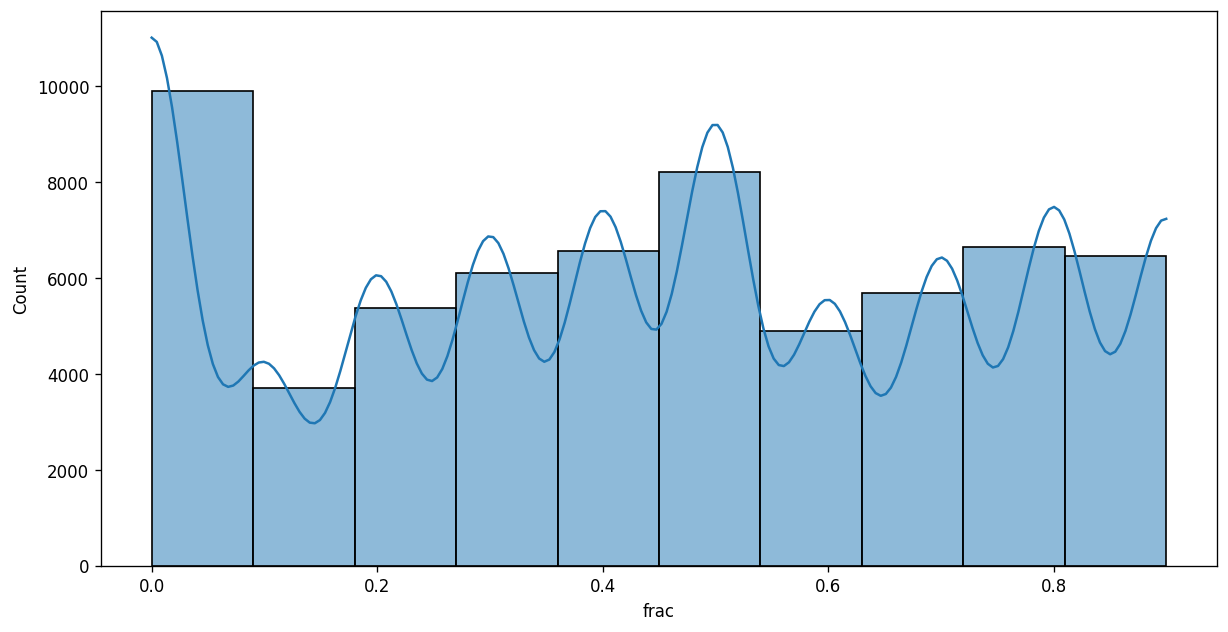

In [157]:
import math
def get_frac(r):
    frac, integer = math.modf(r["High"])
    return frac
ana_data = merged_data.copy()
ana_data['frac'] = ana_data.apply(lambda r: get_frac(r), axis=1)
sns.histplot(ana_data["frac"], bins=10, kde=True)

### Tôi muốn biết body trung bình sẽ tăng hay giảm

Text(0.5, 1.0, 'Tỉ lệ body height avg tăng / giảm so với trước đó khi tạo đỉnh')

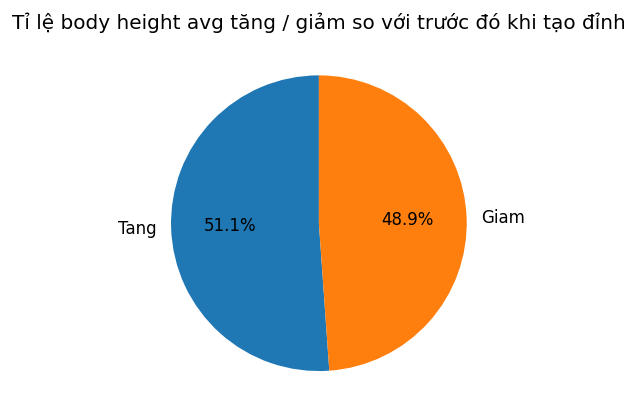

In [122]:
ana_data = merged_data.copy()
ana_data['body'] = ana_data.apply(lambda r: abs(r["Close"] - r["Open"]), axis=1)
ana_data['body_avg'] = ana_data['body'].rolling(20).mean()
ana_data['prev_body_avg'] = ana_data['body_avg'].shift(1)
ana_data.dropna(inplace=True)
ana_data = ana_data[ana_data.High == ana_data.DayHigh]
ana_data['body_avg_group'] = ana_data.apply(lambda r: "Tang" if r["body_avg"] > r["prev_body_avg"] else "Giam", axis=1)
counts = ana_data['body_avg_group'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(
    counts,
    labels=counts.index.astype(str),
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Tỉ lệ body height avg tăng / giảm so với trước đó khi tạo đỉnh")

### Tôi muốn biết mqh giữa giá Close và body nến như nào?

Text(0.5, 1.0, 'Tỉ lệ tạo đỉnh theo group (Price vs Body)')

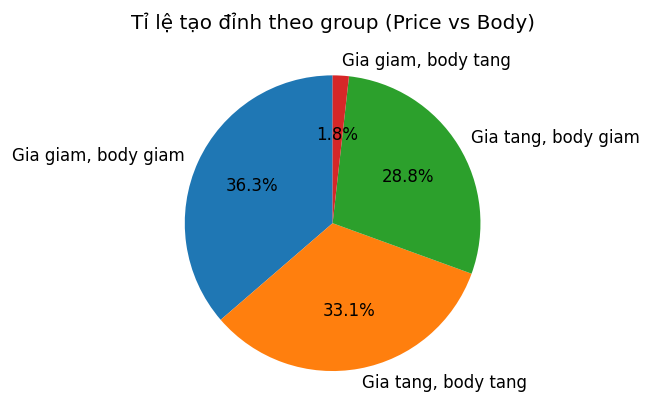

In [123]:
def get_ibs_vol_group(r):
    if r["Close"] > r["prev_Close"] and r["body"] > r["prev_body"]:
        return "Gia tang, body tang"
    if r["Close"] > r["prev_Close"] and r["body"] < r["prev_body"]:
        return "Gia tang, body giam"
    if r["Close"] < r["prev_Close"] and r["body"] > r["prev_body"]:
        return "Gia giam, body tang"
    if r["Close"] < r["prev_Close"] and r["body"] < r["prev_body"]:
        return "Gia giam, body giam"
ana_data = merged_data.copy()
ana_data['body'] = ana_data.apply(lambda r: r["Close"] - r["Open"], axis=1)
ana_data['prev_body'] = ana_data['body'].shift(1)
ana_data.dropna(inplace=True)
ana_data = ana_data[ana_data.High == ana_data.DayHigh]
ana_data["price_vs_body_group"] = ana_data.apply(lambda r: get_ibs_vol_group(r) , axis=1)
counts = ana_data['price_vs_body_group'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(
    counts,
    labels=counts.index.astype(str),
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Tỉ lệ tạo đỉnh theo group (Price vs Body)")


### Tôi muốn biết sự phân phối của độ dài râu nến và cây nến

In [124]:
ana_data = merged_data.copy()
ana_data['upper_shadow'] = ana_data.apply(lambda r: r["High"] - max(r["Open"], r["Close"]), axis=1)
ana_data['candlestick_height'] = ana_data.apply(lambda r: r["High"] - r["Low"], axis=1)
ana_data['prev_upper_shadow'] = ana_data['upper_shadow'].shift(1)
ana_data.dropna(inplace=True)
ana_data = ana_data[ana_data.High == ana_data.DayHigh]
ana_data = ana_data[ana_data.High != ana_data.Low]

<Axes: xlabel='wick_on_length', ylabel='Count'>

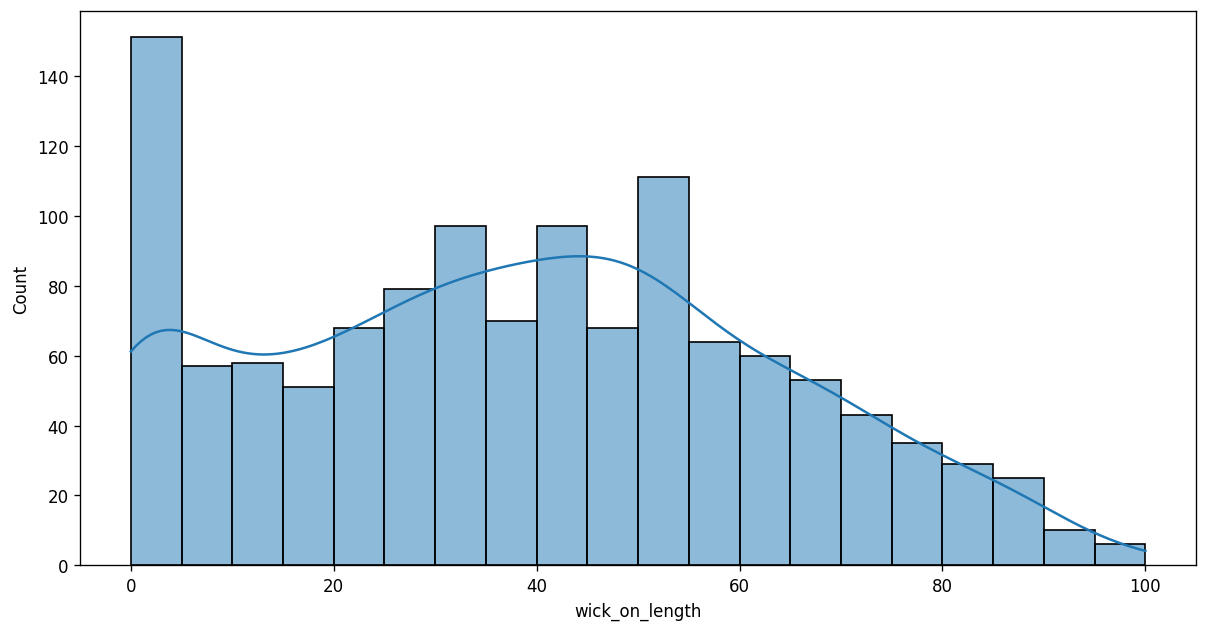

In [125]:
ana_data['wick_on_length'] = ana_data.apply(lambda r: round(r["upper_shadow"] * 100 / r["candlestick_height"], 3), axis=1)
sns.histplot(ana_data["wick_on_length"], bins=20, kde=True)

<Axes: xlabel='body', ylabel='Count'>

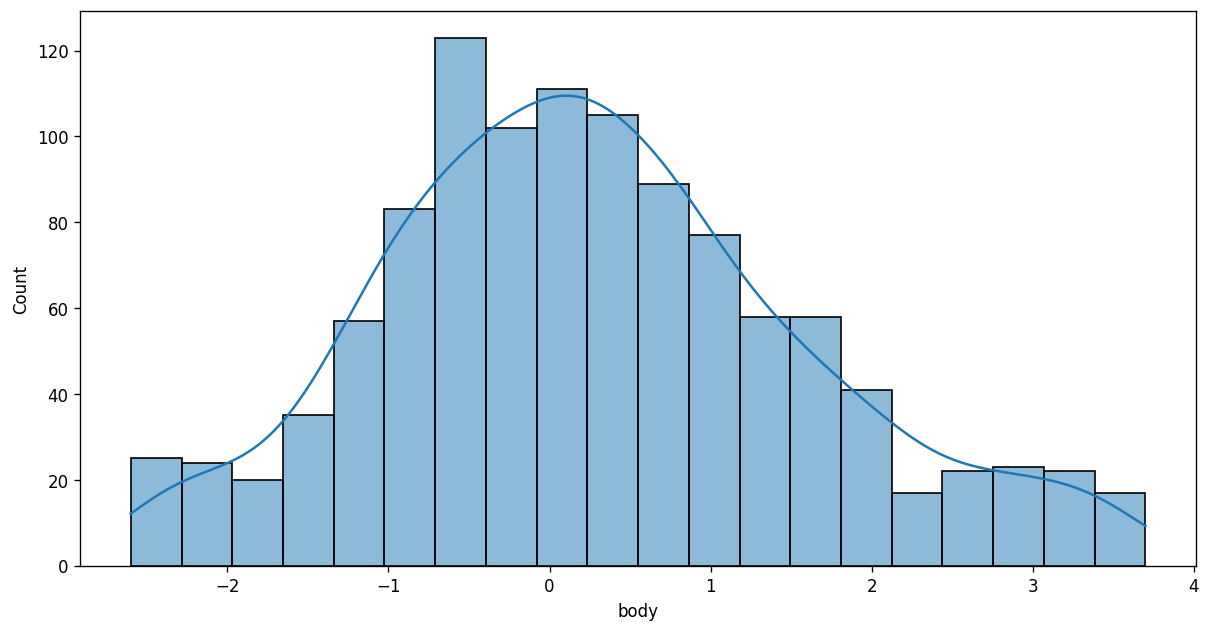

In [126]:
ana_data['body'] = ana_data.apply(lambda r: r["Close"] - r["Open"], axis=1)
lower = ana_data["body"].quantile(0.05)
upper = ana_data["body"].quantile(0.95)
filtered = ana_data[(ana_data["body"] <= upper) & (ana_data["body"] >= lower)]
sns.histplot(filtered["body"], bins=20, kde=True)

### [✔] Tôi muốn biết râu nến tăng hay giảm khi Market tạo đỉnh

Text(0.5, 1.0, 'Tỉ lệ (râu nến tăng hay giảm so với cây nến trước đó) khi tạo đỉnh')

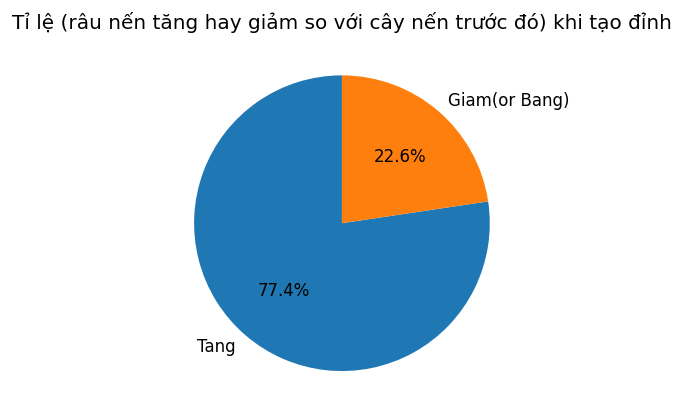

In [127]:
ana_data['upper_wick_group'] = ana_data.apply(lambda r: "Tang" if r["upper_shadow"] > r["prev_upper_shadow"] else "Giam(or Bang)", axis=1)
counts = ana_data['upper_wick_group'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(
    counts,
    labels=counts.index.astype(str),
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Tỉ lệ (râu nến tăng hay giảm so với cây nến trước đó) khi tạo đỉnh")

### Tôi muốn biết z-score sẽ có phân phối như nào

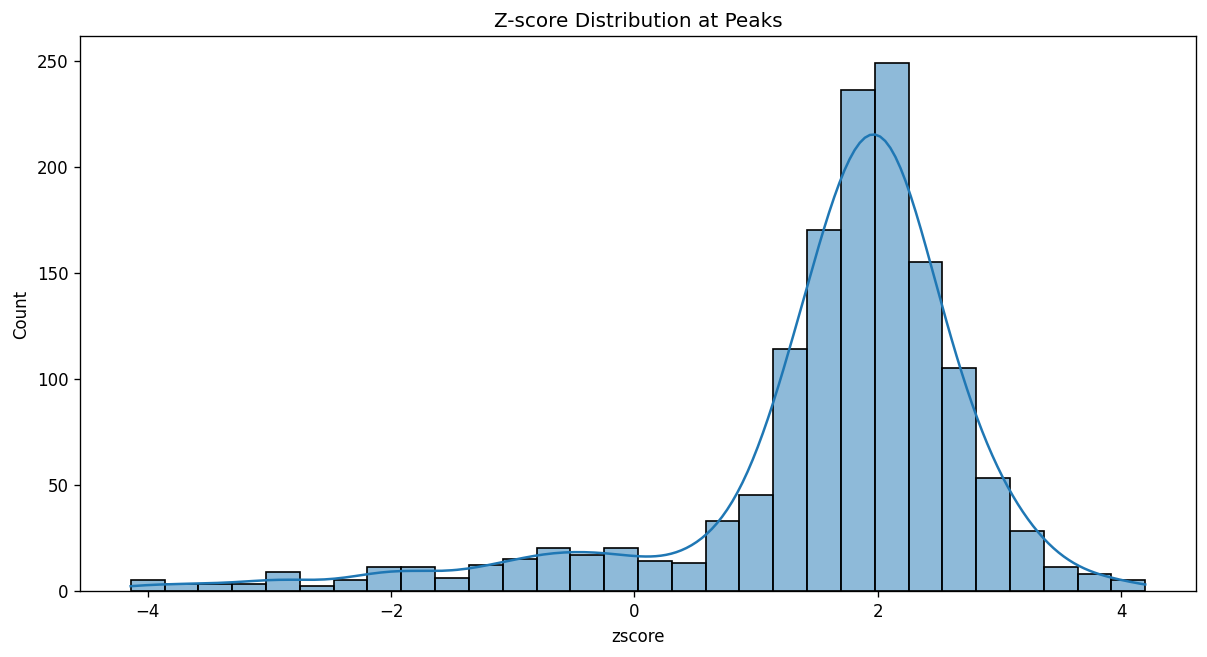

In [128]:
ana_data = merged_data.copy()
ana_data['zscore'] = (ana_data['High'] - ana_data['High'].rolling(20).mean()) / ana_data['High'].rolling(20).std()
ana_data.dropna(inplace=True)
ana_data = ana_data[ana_data.High == ana_data.DayHigh]
sns.histplot(ana_data['zscore'], bins=30, kde=True)
plt.title('Z-score Distribution at Peaks')
plt.show()

### Tôi muốn biết MFI sẽ có phân phối như nào khi Market tạo đỉnh

In [129]:
ana_data = merged_data.copy()
ana_data["MFI_1d"] = ta.mfi(
    high=ana_data["High"],
    low=ana_data["Low"],
    close=ana_data["Close"],
    volume=ana_data["Volume"],
    length=50
)
ana_data["MFI_3d"] = ta.mfi(
    high=ana_data["High"],
    low=ana_data["Low"],
    close=ana_data["Close"],
    volume=ana_data["Volume"],
    length=150
)
ana_data.dropna(inplace=True)
ana_data = ana_data[ana_data.High == ana_data.DayHigh]

Text(0.5, 1.0, 'MFI Distribution at peak')

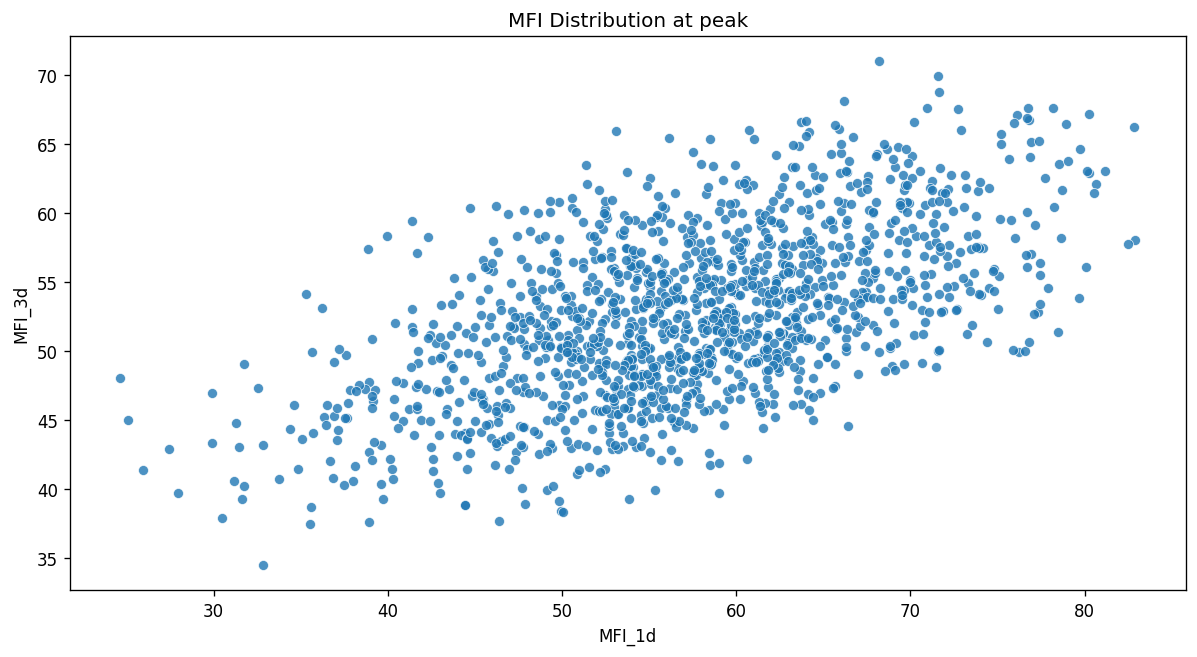

In [130]:
sns.scatterplot(
    data=ana_data[['MFI_1d', 'MFI_3d']],
    x='MFI_1d',
    y='MFI_3d',
    alpha=0.8
)
plt.title('MFI Distribution at peak')

### Tôi muốn biết MFI sẽ tăng hay giảm khi Market tạo đỉnh

Text(0.5, 1.0, 'Tỉ lệ (MFI sẽ tăng hay giảm so với cây nến trước đó) khi tạo đỉnh')

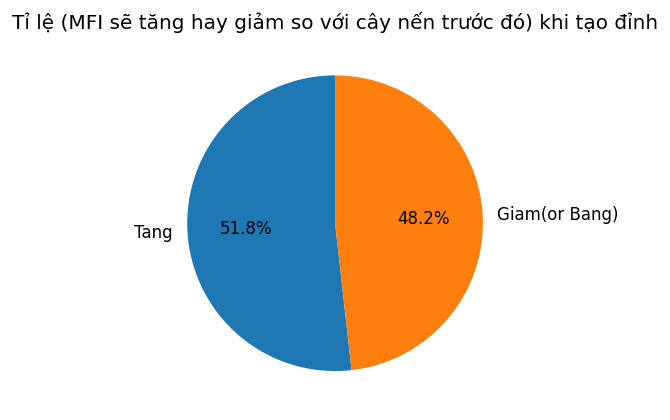

In [131]:
ana_data["prev_MFI_1d"] = ana_data["MFI_1d"].shift(1)
ana_data['MFI_group'] = ana_data.apply(lambda r: "Tang" if r["MFI_1d"] > r["prev_MFI_1d"] else "Giam(or Bang)", axis=1)
ana_data.dropna(inplace=True)
counts = ana_data['MFI_group'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(
    counts,
    labels=counts.index.astype(str),
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Tỉ lệ (MFI sẽ tăng hay giảm so với cây nến trước đó) khi tạo đỉnh")

### [✔] Tôi muốn biết Market thường tạo đỉnh ở group (ibs, volume) nào

In [158]:
def get_ibs_vol_group(r):
    if r["Volume"] > r["prev_Vol"] and r["ibs"] > r["prev_ibs"]:
        return "Vol up, ibs incre"
    if r["Volume"] > r["prev_Vol"] and r["ibs"] < r["prev_ibs"]:
        return "Vol up, ibs decr"
    if r["Volume"] < r["prev_Vol"] and r["ibs"] > r["prev_ibs"]:
        return "Vol down, ibs incre"
    if r["Volume"] < r["prev_Vol"] and r["ibs"] < r["prev_ibs"]:
        return "Vol down, ibs decr"

Text(0.5, 1.0, 'Tỉ lệ tạo đỉnh theo group')

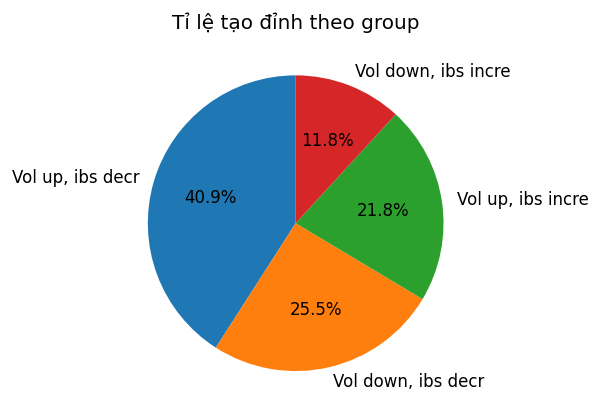

In [161]:
ana_data = merged_data.copy()
ana_data['ibs'] = ana_data.apply(lambda r: 0 if r["High"] == r["Low"] else (r["Close"] - r["Low"]) / (r["High"] - r["Low"]), axis=1)
ana_data['prev_ibs'] = ana_data['ibs'].shift(1)
ana_data.dropna(inplace=True)
ana_data = ana_data[ana_data.High == ana_data.DayHigh]
ana_data = ana_data[ana_data.High != ana_data.Low]
ana_data["ibs_vol_group"] = ana_data.apply(lambda r: get_ibs_vol_group(r) , axis=1)
counts = ana_data['ibs_vol_group'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(
    counts,
    labels=counts.index.astype(str),
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Tỉ lệ tạo đỉnh theo group")

<Axes: xlabel='ibs', ylabel='Count'>

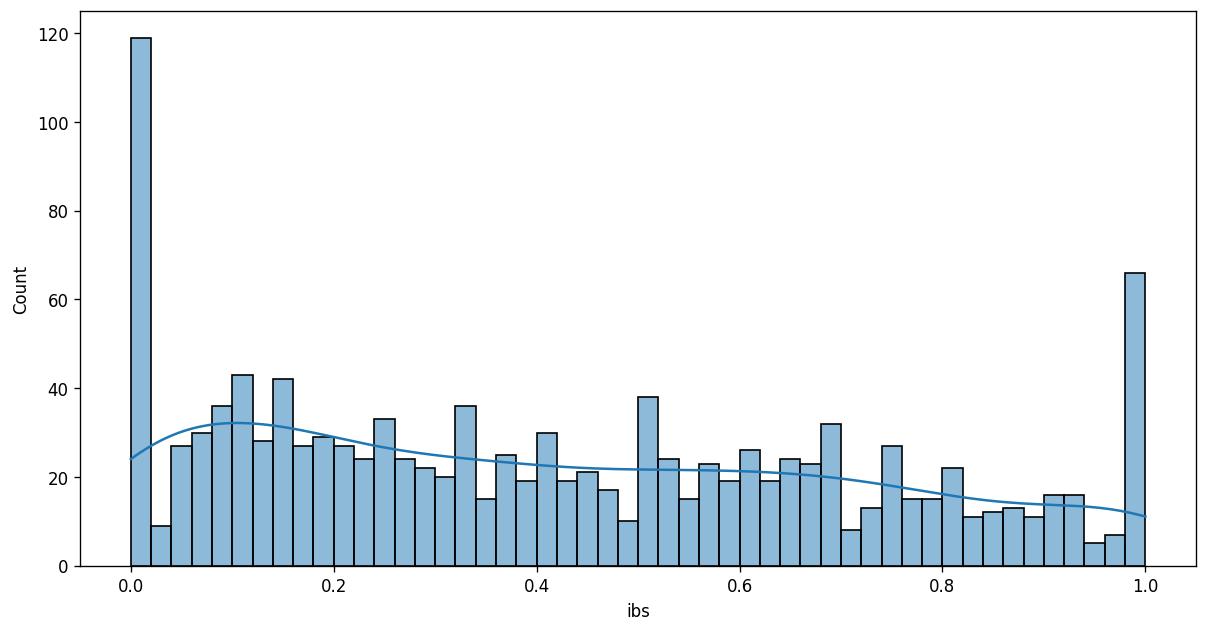

In [162]:
ana_data['ibs'] = ana_data['ibs'].round(2)
sns.histplot(ana_data["ibs"], bins=50, kde=True)

### [✔] Tôi muốn biết Market thường tạo đỉnh vào giờ nào?

<Axes: xlabel='hour'>

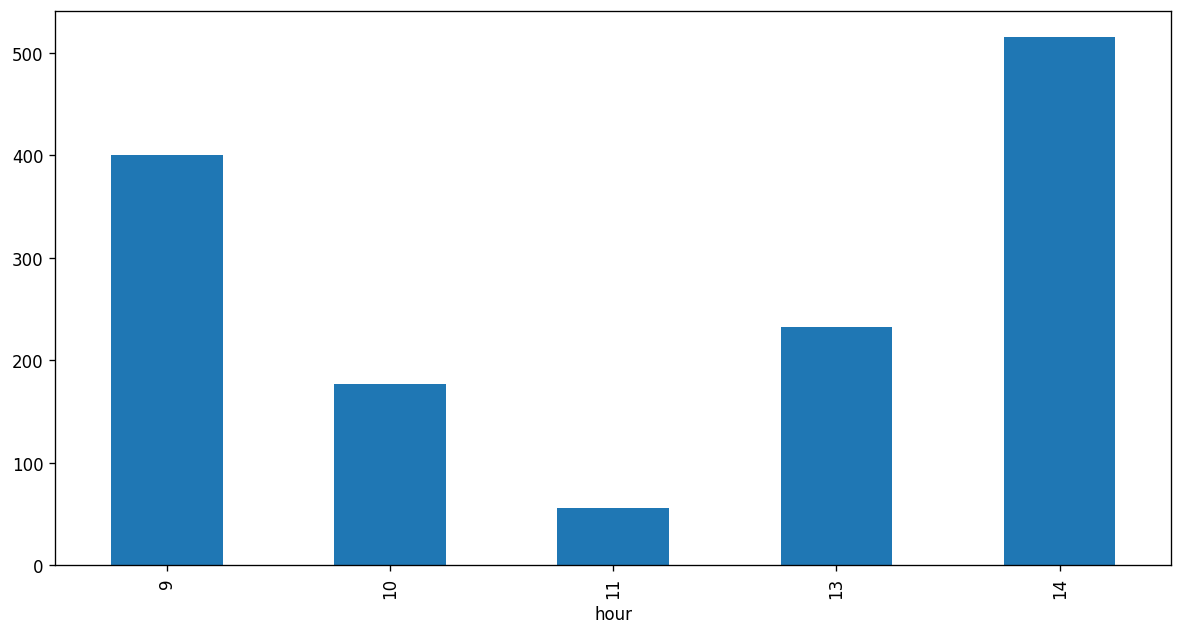

In [134]:
ana_data = merged_data.copy()
ana_data.dropna(inplace=True)
ana_data = ana_data[ana_data.High == ana_data.DayHigh]
group_by_hour = ana_data.groupby(['hour'])['hour'].count().rename({'hour': 'count'})
group_by_hour.plot.bar()

Text(0.5, 1.0, 'Tỉ lệ thời gian tạo đỉnh theo giờ')

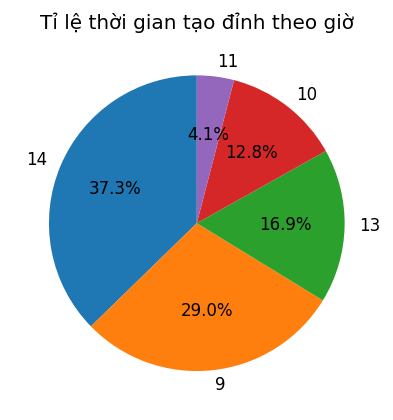

In [135]:
counts = ana_data['hour'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(
    counts,
    labels=counts.index.astype(str),
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Tỉ lệ thời gian tạo đỉnh theo giờ")

### [✔] Tôi muốn biết Market thường tạo đỉnh vào phút nào?

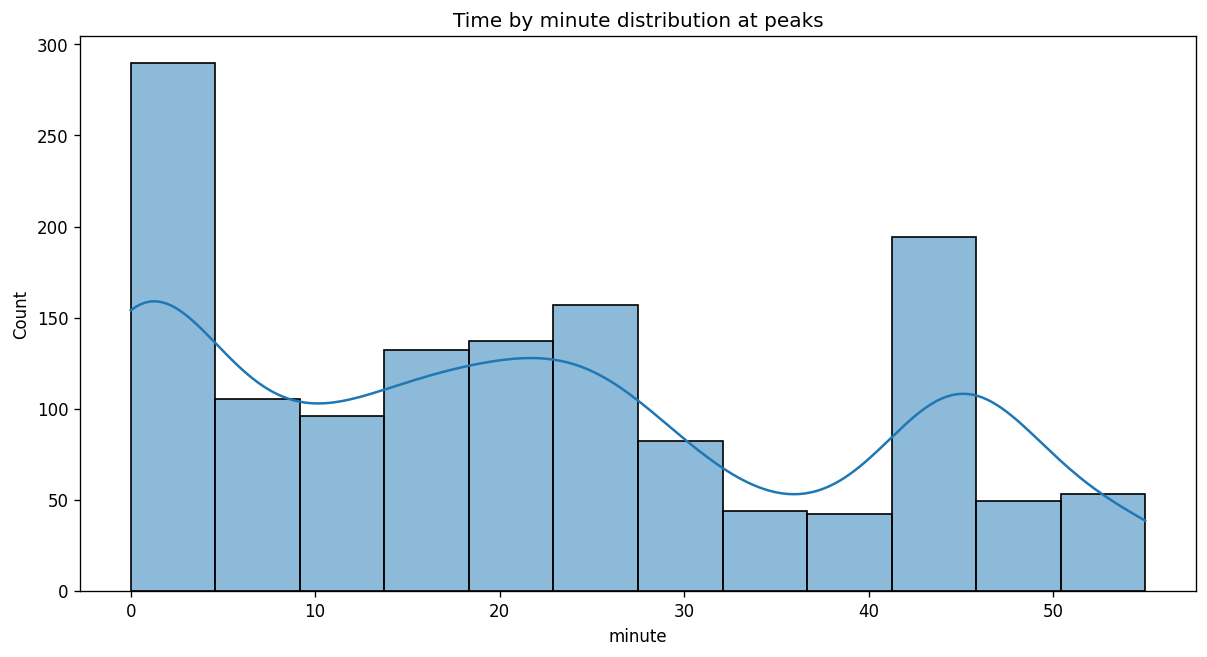

In [153]:
ana_data = merged_data.copy()
ana_data.dropna(inplace=True)
ana_data = ana_data[ana_data.High == ana_data.DayHigh]
sns.histplot(ana_data['minute'], bins=12, kde=True)
plt.title('Time by minute distribution at peaks')
plt.show()

### Tôi muốn biết Market thường tạo đỉnh tại nến xanh hay đỏ?

Text(0.5, 1.0, 'Tỉ lệ màu nến khi tạo đỉnh')

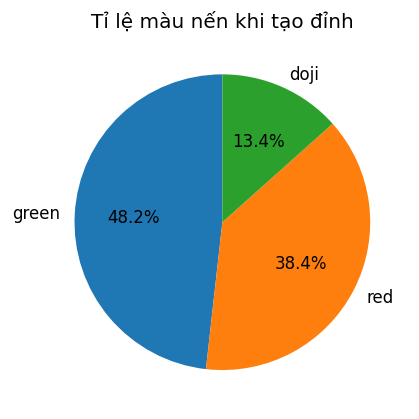

In [137]:
ana_data = merged_data.copy()
ana_data.dropna(inplace=True)
ana_data = ana_data[ana_data.High == ana_data.DayHigh]
ana_data['color'] = ana_data.apply(lambda r: 'doji' if r["Open"] == r["Close"] else ('green' if r["Open"] < r["Close"] else 'red'), axis=1)
counts = ana_data['color'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(
    counts,
    labels=counts.index.astype(str),
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Tỉ lệ màu nến khi tạo đỉnh")

### Tôi muốn biết Market thường tạo đỉnh sau nến xanh hay đỏ?

Text(0.5, 1.0, 'Tỉ lệ tạo đỉnh sau nến xanh hay đỏ')

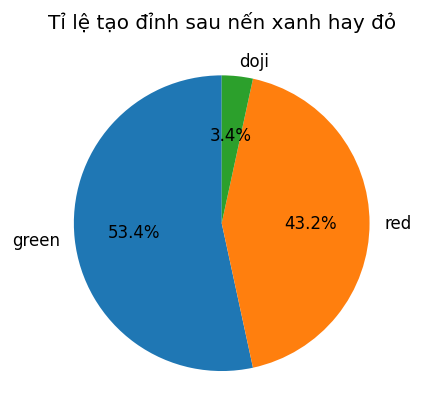

In [138]:
# Remove special time
ana_data = ana_data[(100 * ana_data.index.hour + ana_data.index.minute != 1130) & (100 * ana_data.index.hour + ana_data.index.minute != 1430) & (100 * ana_data.index.hour + ana_data.index.minute != 1445)]
ana_data['prev_color'] = ana_data['color'].shift(1)
ana_data.dropna(inplace=True)
counts = ana_data['prev_color'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(
    counts,
    labels=counts.index.astype(str),
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Tỉ lệ tạo đỉnh sau nến xanh hay đỏ")

### Bộ 3 cây nến tại đỉnh

Text(0.5, 1.0, 'Bộ 3 cây nến tại đỉnh')

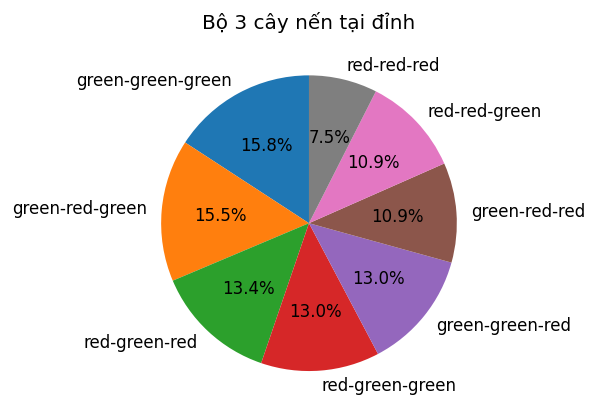

In [139]:
def group_3colors(r):
    return f'{r["_2bar_ago_color"]}-{r["prev_color"]}-{r["color"]}'

ana_data = ana_data[ana_data.color != 'doji']
ana_data['prev_color'] = ana_data['color'].shift(1)
ana_data['_2bar_ago_color'] = ana_data['color'].shift(2)
ana_data.dropna(inplace=True)
ana_data['_3bars_color_group'] = ana_data.apply(lambda r: group_3colors(r), axis=1)
counts = ana_data['_3bars_color_group'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(
    counts,
    labels=counts.index.astype(str),
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Bộ 3 cây nến tại đỉnh")

### [✔] Tôi muốn biết vùng RSI nào hay gặp tại đỉnh?

Text(0.5, 1.0, 'Tỉ lệ vùng RSI khi tạo đỉnh')

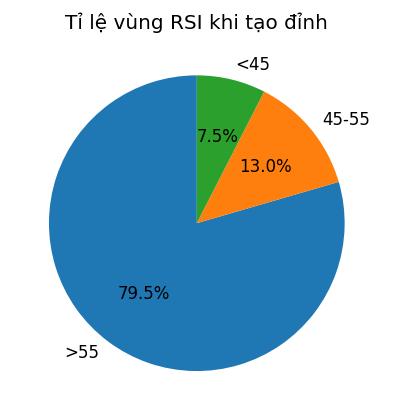

In [141]:
ana_data = merged_data.copy()
ana_data['RSI20'] = ta.rsi(ana_data["Close"], length=20)
ana_data['RSI10'] = ta.rsi(ana_data["Close"], length=10)
ana_data.dropna(inplace=True)
ana_data = ana_data[ana_data.High == ana_data.DayHigh]
ana_data['rsi_area'] = ana_data.apply(lambda r: '>55' if r["RSI20"] > 55 else ('<45' if r["RSI20"] < 45 else '45-55'), axis=1)
counts = ana_data['rsi_area'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(
    counts,
    labels=counts.index.astype(str),
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Tỉ lệ vùng RSI khi tạo đỉnh")

Text(0.5, 1.0, 'Tỉ lệ vùng RSI khi tạo đỉnh')

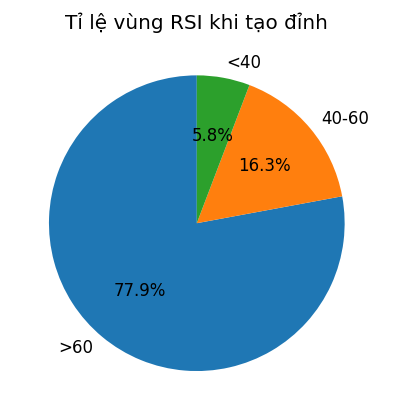

In [142]:
ana_data['rsi10_area'] = ana_data.apply(lambda r: '>60' if r["RSI10"] > 60 else ('<40' if r["RSI10"] < 40 else '40-60'), axis=1)
counts = ana_data['rsi10_area'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(
    counts,
    labels=counts.index.astype(str),
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Tỉ lệ vùng RSI khi tạo đỉnh")

### Tôi muốn biết bao nhiêu % xuất hiện FVG?

Text(0.5, 1.0, 'Tỉ lệ xuất hiện FVG khi tạo đỉnh')

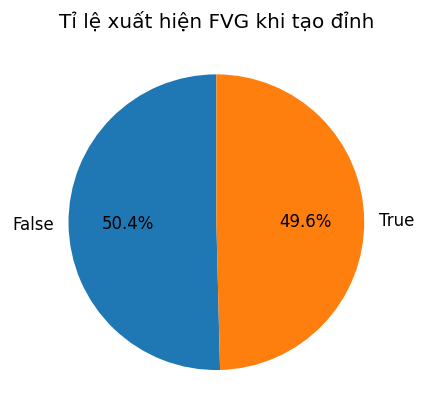

In [143]:
ana_data = merged_data.copy()
ana_data['is_FVG'] = ana_data["Low"] > ana_data["High"].shift(2)
ana_data.dropna(inplace=True)
ana_data = ana_data[ana_data.High == ana_data.DayHigh]
counts = ana_data['is_FVG'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(
    counts,
    labels=counts.index.astype(str),
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Tỉ lệ xuất hiện FVG khi tạo đỉnh")

### [✔] Tôi muốn biết bao nhiêu % High tăng nhưng Volume giảm

Text(0.5, 1.0, 'Tỉ lệ (High tăng nhưng Volume giảm) khi tạo đỉnh')

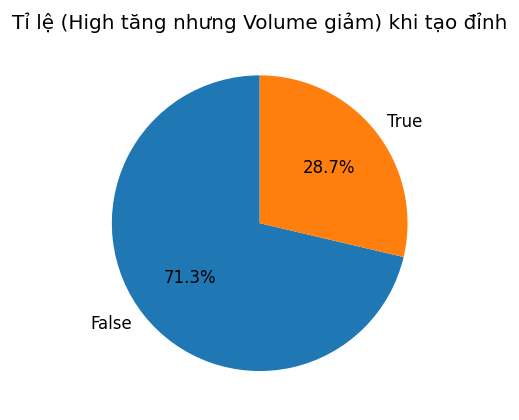

In [144]:
ana_data = merged_data.copy()
ana_data.dropna(inplace=True)
ana_data = ana_data[ana_data.High == ana_data.DayHigh]
ana_data['higher_high_lower_vol'] = ana_data.apply(lambda r: True if (r["High"] > r["prev_High"] and r["Volume"] < r["prev_Vol"]) else False, axis=1)
counts = ana_data['higher_high_lower_vol'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(
    counts,
    labels=counts.index.astype(str),
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Tỉ lệ (High tăng nhưng Volume giảm) khi tạo đỉnh")

### [✔] Tôi muốn biết Volume thường cao hay thấp hơn Volume trung bình

Text(0.5, 1.0, 'Tỉ lệ Volume tăng so với TB khi tạo đỉnh')

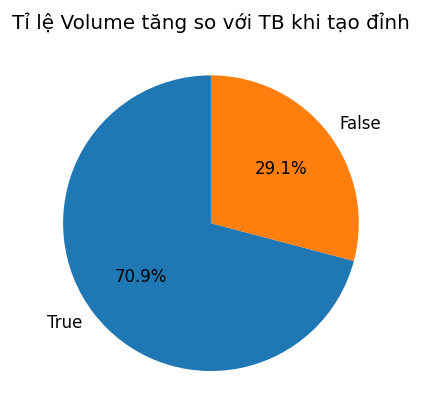

In [145]:
ana_data = merged_data.copy()
ana_data['avg_Volume'] = ana_data['Volume'].rolling(20).mean()
ana_data['Volume_higher_avg'] = ana_data.apply(lambda r: True if r["Volume"] > r["avg_Volume"] else False, axis=1)
ana_data = ana_data[ana_data.High == ana_data.DayHigh]
ana_data.dropna(inplace=True)
counts = ana_data['Volume_higher_avg'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(
    counts,
    labels=counts.index.astype(str),
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Tỉ lệ Volume tăng so với TB khi tạo đỉnh")

### [✔] Tôi muốn biết Volume thường cao hay thấp hơn Volume cây nến trước đó

Text(0.5, 1.0, 'Tỉ lệ Volume tăng/giảm so với cây nến trước đó khi tạo đỉnh')

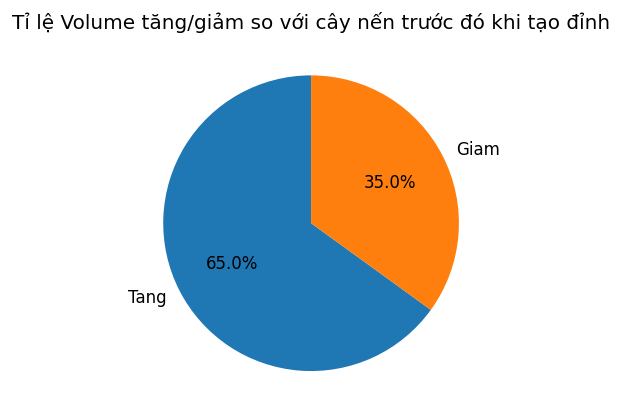

In [146]:
ana_data = merged_data.copy()
ana_data['Volume_vs_prev_Vol'] = ana_data.apply(lambda r: "Tang" if r["Volume"] > r["prev_Vol"] else "Giam", axis=1)
ana_data = ana_data[ana_data.High == ana_data.DayHigh]
ana_data.dropna(inplace=True)
counts = ana_data['Volume_vs_prev_Vol'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(
    counts,
    labels=counts.index.astype(str),
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Tỉ lệ Volume tăng/giảm so với cây nến trước đó khi tạo đỉnh")

### [✔] Tôi muốn biết Volume trung bình tăng hay giảm so với trước đó

Text(0.5, 1.0, 'Tỉ lệ Volume avg tăng / giảm so với trước đó khi tạo đỉnh')

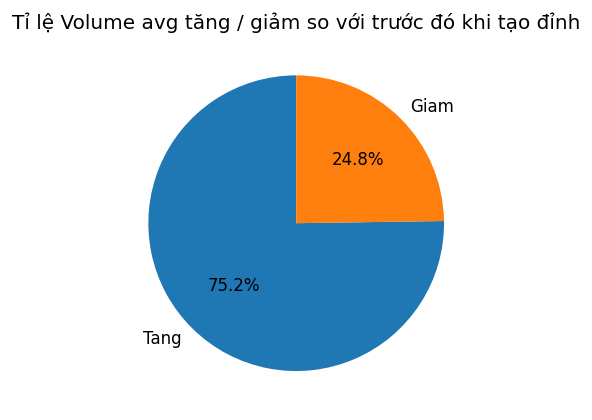

In [147]:
ana_data = merged_data.copy()
ana_data['Volume_avg'] = ana_data['Volume'].rolling(20).mean()
ana_data['prev_Volume_avg'] = ana_data['Volume_avg'].shift(1)
ana_data['Volume_avg_group'] = ana_data.apply(lambda r: "Tang" if r["Volume_avg"] > r["prev_Volume_avg"] else "Giam", axis=1)
ana_data = ana_data[ana_data.High == ana_data.DayHigh]
ana_data.dropna(inplace=True)
counts = ana_data['Volume_avg_group'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(
    counts,
    labels=counts.index.astype(str),
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Tỉ lệ Volume avg tăng / giảm so với trước đó khi tạo đỉnh")

### Tôi muốn biết bao nhiêu % High tăng nhưng RSI giảm

Text(0.5, 1.0, 'Tỉ lệ (High tăng nhưng RSI giảm) khi tạo đỉnh')

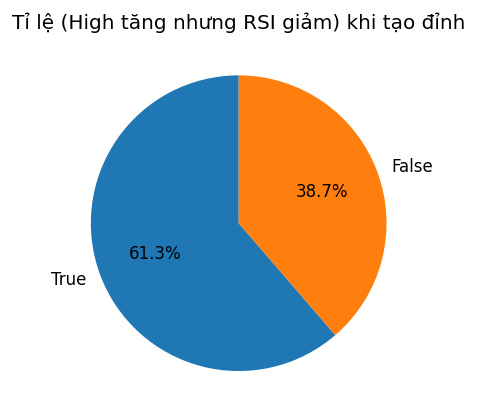

In [148]:
ana_data = merged_data.copy()
ana_data['RSI24'] = ta.rsi(ana_data["Close"], length=24)
ana_data['prev_RSI24'] = ana_data['RSI24'].shift(1)
ana_data.dropna(inplace=True)
ana_data = ana_data[ana_data.High == ana_data.DayHigh] 
ana_data['high_and_rsi_group'] = ana_data.apply(lambda r: True if (r["High"] > r["prev_High"] and r["RSI24"] > r["prev_RSI24"]) else False, axis=1)
ana_data.dropna(inplace=True)
counts = ana_data['high_and_rsi_group'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(
    counts,
    labels=counts.index.astype(str),
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Tỉ lệ (High tăng nhưng RSI giảm) khi tạo đỉnh")

### [✔] Tôi muốn biết giá Close thường nằm ở vị trí nào?

Text(0.5, 1.0, 'Tỉ lệ vi tri gia Close(so voi cay nen truoc do) khi tạo đỉnh')

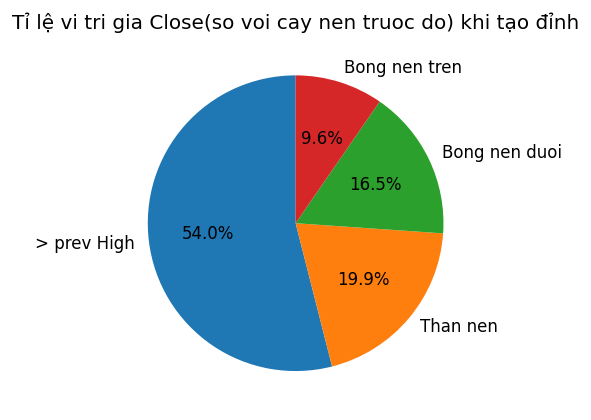

In [149]:
def get_close_price_position(r):
    if r["Close"] > r["prev_High"]:
        return "> prev High"
    if r["Close"] > max(r["prev_Close"], r["prev_Open"]):
        return "Bong nen tren "
    if max(r["prev_Close"], r["prev_Open"]) > r["Close"] > min(r["prev_Close"], r["prev_Open"]):
        return "Than nen"
    if r["Close"] < min(r["prev_Close"], r["prev_Open"]):
        return "Bong nen duoi"
    if r["Close"] < r["prev_Low"]:
        return "< prev Low"  
ana_data = merged_data.copy()
ana_data = ana_data[ana_data.High == ana_data.DayHigh]
ana_data['close_price_group'] = ana_data.apply(lambda r: get_close_price_position(r), axis=1)
ana_data.dropna(inplace=True)
counts = ana_data['close_price_group'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(
    counts,
    labels=counts.index.astype(str),
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Tỉ lệ vi tri gia Close(so voi cay nen truoc do) khi tạo đỉnh")

### [✔] Tôi muốn biết giá vị trí giá Open ở  đâu so với Close trước đó?

Text(0.5, 1.0, 'Tỉ lệ vi tri gia Open(so voi Close truoc do) khi tạo đỉnh')

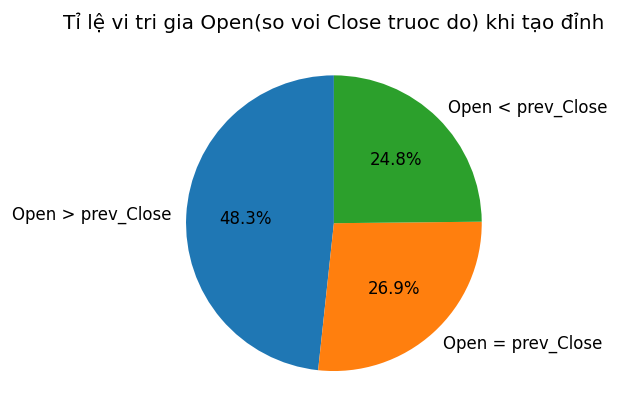

In [150]:
def get_open_price_position(r):
    if r["Open"] > r["prev_Close"]:
        return "Open > prev_Close"
    if r["Open"] == r["prev_Close"]:
        return "Open = prev_Close"
    if r["Open"] < r["prev_Close"]:
        return "Open < prev_Close"
ana_data = merged_data.copy()
ana_data = ana_data[ana_data.High == ana_data.DayHigh]
ana_data['opene_price_group'] = ana_data.apply(lambda r: get_open_price_position(r), axis=1)
ana_data.dropna(inplace=True)
counts = ana_data['opene_price_group'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(
    counts,
    labels=counts.index.astype(str),
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Tỉ lệ vi tri gia Open(so voi Close truoc do) khi tạo đỉnh")

### [✔] Tôi muốn biết giá High so với Upper_Bollinger_Band thế nào?

Text(0.5, 1.0, 'Tỉ lệ (High nằm trên/dưới đường upper BB) khi tạo đỉnh')

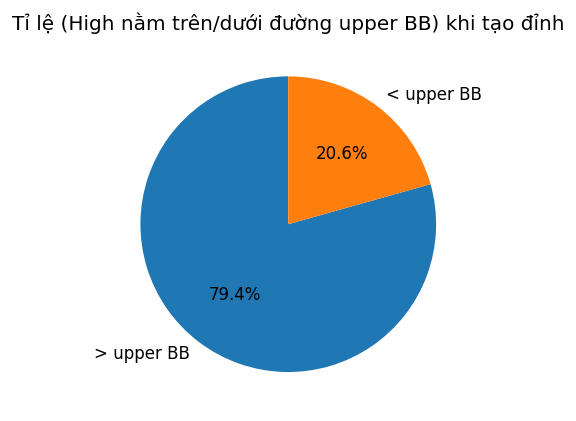

In [151]:
ana_data = merged_data.copy()
ana_data["MB"] = ana_data["Close"].rolling(20).mean()
ana_data["STD"] = ana_data["Close"].rolling(20).std()
ana_data["UB"] = ana_data["MB"] + 1.5 * ana_data["STD"]
ana_data = ana_data[ana_data.High == ana_data.DayHigh] 
ana_data['High_position'] = ana_data.apply(lambda r: '> upper BB' if r["High"] > r["UB"] else '< upper BB', axis=1)
ana_data.dropna(inplace=True)
counts = ana_data['High_position'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(
    counts,
    labels=counts.index.astype(str),
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Tỉ lệ (High nằm trên/dưới đường upper BB) khi tạo đỉnh")

### [✔] Tôi muốn biết có hiện tượng "Bollinger rejection" hay không?

Text(0.5, 1.0, 'Tỉ lệ Bollinger rejection khi tạo đỉnh')

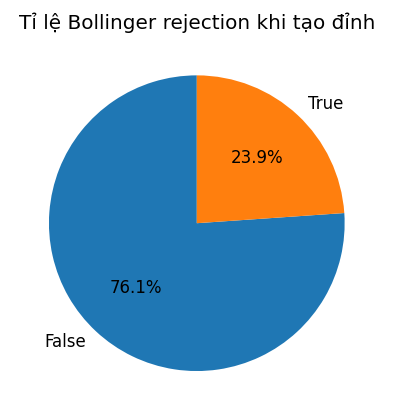

In [152]:
# Giá xuyên band nhưng đóng bên trong → Bollinger rejection
ana_data = ana_data[ana_data.High_position == '> upper BB']
ana_data["BB_rejection"] = ana_data.apply(lambda r: True if r["Close"] < r["UB"] else False, axis=1)
ana_data.dropna(inplace=True)
counts = ana_data['BB_rejection'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(
    counts,
    labels=counts.index.astype(str),
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Tỉ lệ Bollinger rejection khi tạo đỉnh")